# FUEL EFFICIENCY PREDICT

In [143]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
import warnings
warnings.filterwarnings('ignore')

In [144]:
df=pd.read_csv("auto-mpg.csv")

In [145]:
df.shape

(398, 9)

In [146]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [148]:
df = df[df['horsepower'] != '?']

In [149]:
df['horsepower'] = df['horsepower'].astype(int)

In [150]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [151]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [152]:
df.drop_duplicates().sum()

mpg                                                        9190.8
cylinders                                                    2145
displacement                                              76209.5
horsepower                                                  40952
weight                                                    1167213
acceleration                                               6092.2
model year                                                  29784
origin                                                        618
car name        chevrolet chevelle malibubuick skylark 320plym...
dtype: object

In [153]:
df["horsepower"].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82])

In [154]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

In [155]:
df.corr

<bound method DataFrame.corr of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130    3504          12.0   
1    15.0          8         350.0         165    3693          11.5   
2    18.0          8         318.0         150    3436          11.0   
3    16.0          8         304.0         150    3433          12.0   
4    17.0          8         302.0         140    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0          86    2790          15.6   
394  44.0          4          97.0          52    2130          24.6   
395  32.0          4         135.0          84    2295          11.6   
396  28.0          4         120.0          79    2625          18.6   
397  31.0          4         119.0          82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu

In [156]:
df.drop('displacement',
		axis=1,
		inplace=True)

# GRAPH

In [157]:
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df)

      mpg  cylinders  horsepower  weight  acceleration  model year  origin
0    18.0          8         130    3504          12.0          70       1
1    15.0          8         165    3693          11.5          70       1
2    18.0          8         150    3436          11.0          70       1
3    16.0          8         150    3433          12.0          70       1
4    17.0          8         140    3449          10.5          70       1
..    ...        ...         ...     ...           ...         ...     ...
393  27.0          4          86    2790          15.6          82       1
394  44.0          4          52    2130          24.6          82       2
395  32.0          4          84    2295          11.6          82       1
396  28.0          4          79    2625          18.6          82       1
397  31.0          4          82    2720          19.4          82       1

[392 rows x 7 columns]


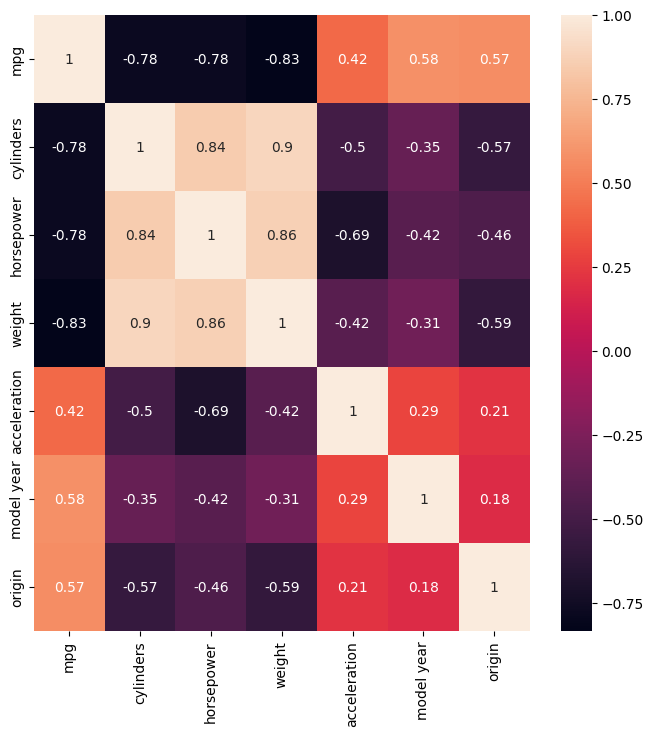

In [158]:
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_df.corr(),
		annot=True)
plt.show()

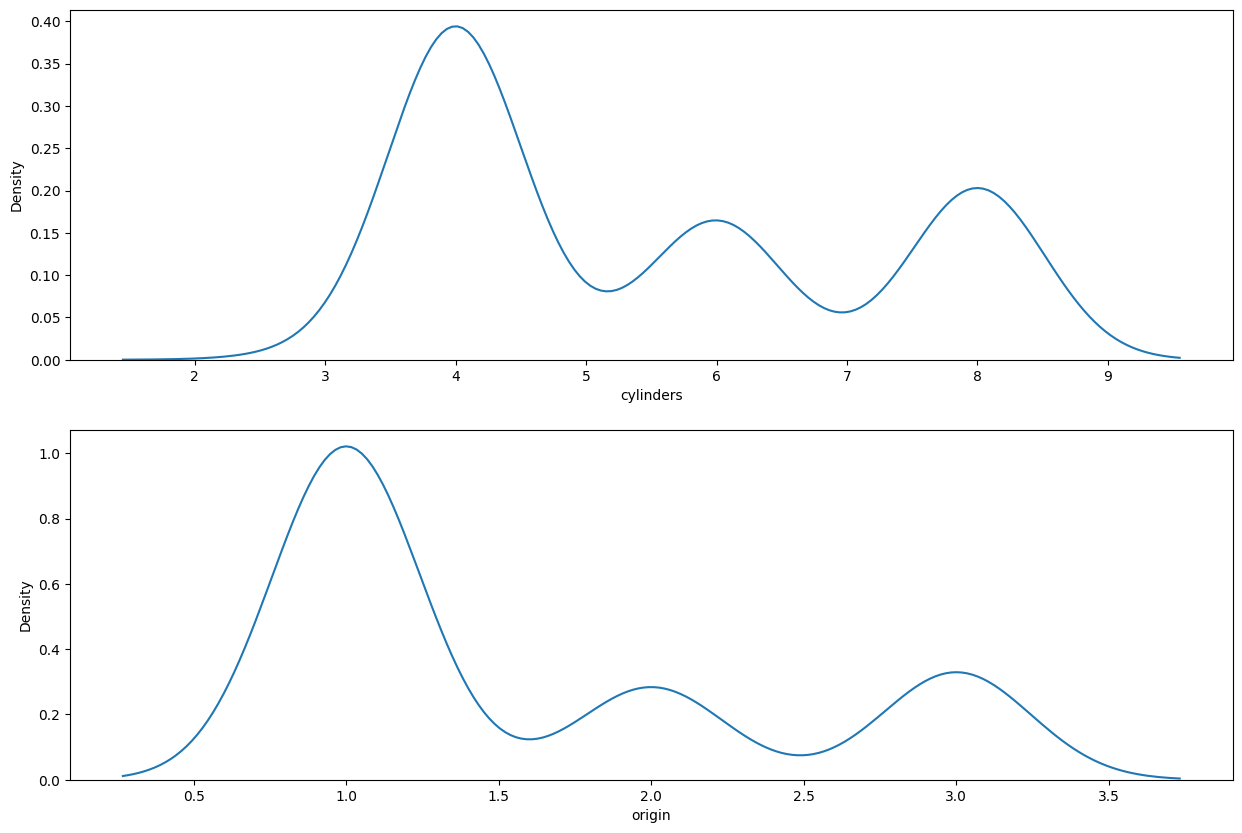

In [159]:
num_col=["cylinders","origin"]
plt.figure(figsize=(15,10))
for i in range(len(num_col)):
    plt.subplot(2,1,i+1)
    sns.kdeplot(data=df[num_col[i]])
plt.show()


# Training & Testing DataSet 

# model prepare for using deep learning (adam)

In [160]:
features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=22)
X_train.shape, X_val.shape

((313, 6), (79, 6))

In [161]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train))
	.batch(32)
	.prefetch(AUTO)
)

val_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_val, Y_val))
	.batch(32)
	.prefetch(AUTO)
)

In [162]:
model = keras.Sequential([
	layers.Dense(256, activation='relu', input_shape=[6]),
	layers.BatchNormalization(),
	layers.Dense(256, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(1, activation='relu')
])

In [163]:
model.compile(
	loss='mae',
	optimizer='adam',
	metrics=['mape']
)

In [164]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [165]:
history = model.fit(X_train,Y_train,
					epochs=50,
					validation_data=val_ds)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 23.2667 - mape: 96.4821 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.2658 - mape: 87.6338 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 18.6671 - mape: 82.2201 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.4291 - mape: 75.2425 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.0218 - mape: 70.0880 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.8970 - mape: 66.8706 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.1164 - mape: 62.8911 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.6214 - mape: 58.7110 - val_loss: 21.9499 - val_mape: 98.5669
Epoch 9/50
10/1

In [166]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mape,val_loss,val_mape
0,22.088638,94.283134,22.418987,100.0
1,19.677504,86.309685,22.418987,100.0
2,18.019436,80.416573,22.418987,100.0
3,16.380812,74.692520,22.418987,100.0
4,14.880801,69.486755,22.418987,100.0


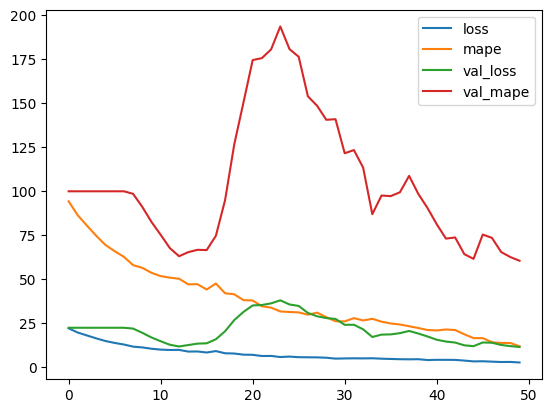

In [167]:
history_df.plot()
plt.show()